In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
import random as rd
print(tf.config.list_physical_devices('GPU'))
gpus = tf.config.experimental.list_physical_devices('GPU')
print(f'Number of GPU\'s: {len(gpus)}')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True) 
#Limits the memory growth of the GPU and makes sure the program just uses the requested GPU power.

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Number of GPU's: 1


In [2]:
from tensorflow.keras.datasets import fashion_mnist
import warnings
warnings.filterwarnings("ignore")

In [3]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
              
len(labels)

10

In [10]:
train_data, test_data = train_data/255, test_data/255
train_data.min(), train_data.max()

(0.0, 1.0)

In [5]:
def show_img():
    plt.figure(figsize=(6,6))
    for i in range(9):
        plt.subplot(3,3, i+1)
        rand_ind = rd.choice(range(len(train_data)))
        plt.imshow(train_data[rand_ind], cmap = plt.cm.RdYlBu)
        plt.title(labels[train_labels[rand_ind]])
        plt.axis(False)
        
    

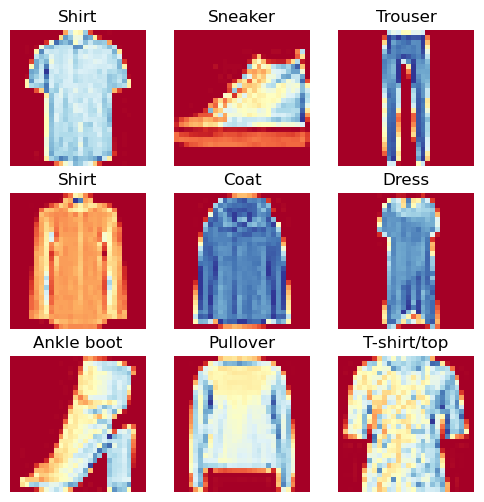

In [6]:
show_img()

In [8]:
train, test = tf.one_hot(train_labels, depth = len(labels)), tf.one_hot(test_labels, depth = len(labels))
train[0], test[0]

(<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)>)

In [21]:
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    tf.kears.layers.Flatten(input_shape = (28,28)),
    Dense(128, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax')
    ])

model_1.compile(
    loss = tf.kears.losses.CategorialCrossentropy(),
    optimizer = 'Adam',
    metrics = ['accuracy']
    )

model_1_history = model_1.fit(train_data, train, epochs = 10, validation_data =(test_data, test))

TensorShape([28, 28])